In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import dc_stat_think as dcst
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv(r"C:\Users\ViG\Desktop\Marketing_Analysis.csv")
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


<Axes: ylabel='marital'>

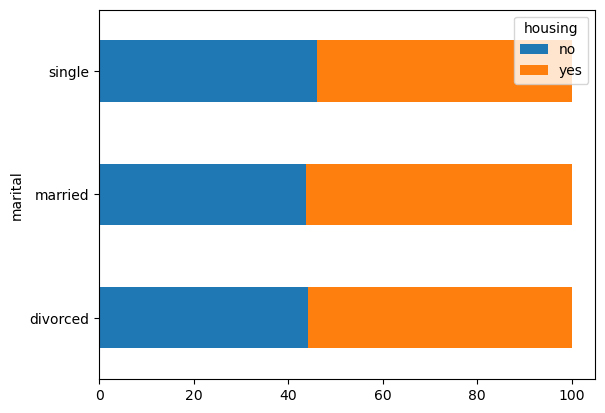

In [4]:
##  utilizar la columna de estado marital y planeteamento de la hipotesis
 
grafico=pd.crosstab(data.marital,data.housing)
grafico_porcentual= grafico.apply(lambda x: (x*100)/sum(x),axis=1)
grafico_porcentual.plot.barh(stacked=True)

In [5]:
## Establecer la hipotesis nula y la hipotesis alternativa

## ( HIPOTESIS NULA) No existe una diferencia significativa entre los personas solteras y casadas a la tenencia de hogar propio 
## ( HIPOTESIS ALTERNATIVA) Existe una diferencia significativa entre el estado materital a la proporcion de tenencia de hogar propio


## Estadisticamente se buscar rechazar la hipotesis nula 

## Seleccionar las variables de interes
## LOC Devuelve el elemento que se encuentra en la fila con nombre fila y la columna de con nombre columna del DataFrame 

analisis = data.loc[data['housing'].isin(['yes','no']),
                   ['marital','housing']]
analisis.head()




,marital,housing
0,married,yes
1,single,yes
2,married,yes
3,married,yes
4,single,no


In [20]:
## Genere Muestras permutadas y ejecute replicas de esta (se debe preprarar la funcion primero)

## Funcion para las permutaciones
## Muestra permutada se da aaprtir de dos conjuntos de datos
## Verificar ventana de gaus para rechazar o aceptar la hipotesis nula


def permutation_sample(data1,data2):
    
    ## concatenar conjuntos de la data
    info = np.concatenate((data1,data2))
    
    ##permutar los arreglos concatenados:datos permutados
    permuted_info = np.random.permutation(info)
    
    ## Dividir el arreglo permutado en dos
    perm_sample_1 = permuted_info[:len(data1)]
    perm_sample_2 = permuted_info[len(data1):]

    return perm_sample_1, perm_sample_2


In [10]:
## Generar Muestra permutadas, se crean dos variables ya que regresa dos conjuntos de datos
## Se especifican los conjuntos de datos

perm_sample_1, perm_sample_2 = permutation_sample(
                                 data.loc[data['marital'] == 'married',['housing']],
                                 data.loc[data['marital'] == 'single',['housing']])


In [15]:
#### Se crea la funcion para definir la diferencia entre proporciones###


def diff_of_props(data_1,data_2,value):
    """Diferencia entre los promedios de dos arreglos"""
    
    # se calcula la diferencia entre las proporciones de datos 1 y datos 2: diff
    diff=np.mean(data_1[:,0]==value) - np.mean(data_2[:,0]==value)
    
    return diff

diff_empiricas_prop=diff_of_props(perm_sample_1,perm_sample_2,'yes')
diff_empiricas_prop

0.0020795475446599987

In [16]:
def draw_perm_reps(data_1,data_2,func,value,size=1, prop=0):
    """Multiples repeticiones permutadas"""

    
    # Inicializar un arreglo (matrix) un arreglo puede contener una o varias columnas de repeticiones: perm_replicates
    perm_replicates = np.empty(size)
        
        
    for i in range(size):
        # Se genera la muestra permutada 
        perm_sample_1,perm_perm_sample_2 = permutation_sample(data_1,data_2)
        
        ## computar el estadistico de prueba
        
        if prop ==0:
            perm_replicates[i] = func(perm_sample_1,perm_sample_2)
        elif prop == 1:
            perm_replicates[i] = func(perm_sample_1,perm_sample_2,value)  
            
    return perm_replicates

In [25]:
## Para poder general el nivel de significancia se debe de crear los objetos para las permutaciones 

perm_replicates = draw_perm_reps(data.loc[data['marital'] == 'married',['housing']],
                                 data.loc[data['marital'] == 'single',['housing']],
                                 diff_of_props, value = 'yes', size=10000, prop =1)

In [43]:
## Establecer el nivel de significancia α  (estadisticamente significativo) y revisar la region critica

nvl_95 = np.percentile(perm_replicates,95)
nvl_975 = np.percentile(perm_replicates,97.5)
nvl_995 = np.percentile(perm_replicates,99.5)

nvl_5 = np.percentile(perm_replicates,5)
nvl_275 = np.percentile(perm_replicates,2.5)
nvl_005 = np.percentile(perm_replicates,0.5)

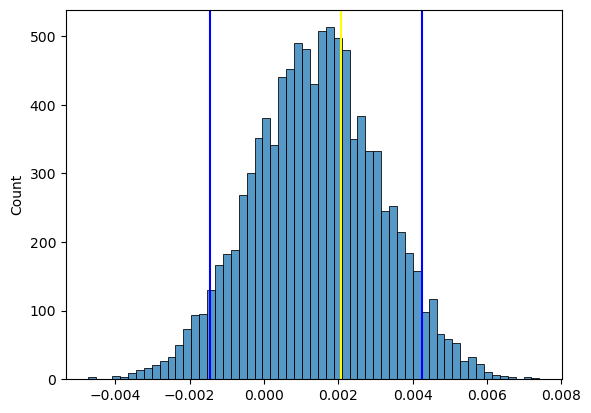

In [44]:
## Graficar el nivel de significancia aun 95% y la region crtica segun el nivel de confianza

sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="yellow")
plt.axvline(nvl_95,c="blue")
plt.axvline(nvl_5,c="blue")

## El resultado muestra que no hay suficiente evidencia para rechazar la hipotesis nula (prueba de hipotesis a dos colas) linea amarilla es el valor empirico

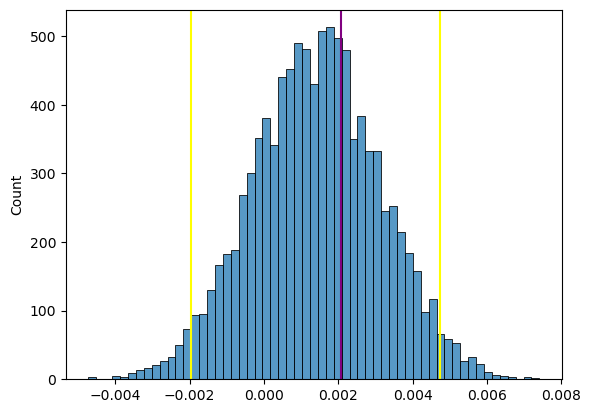

In [47]:
## Elija diferentes metodos de prueba de hipotesis segun el problema

sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="purple")
plt.axvline(nvl_975,c="yellow")
plt.axvline(nvl_275,c="yellow")

## No hay suficiente evidencia estadistica para rechazar la hipotesis nula 

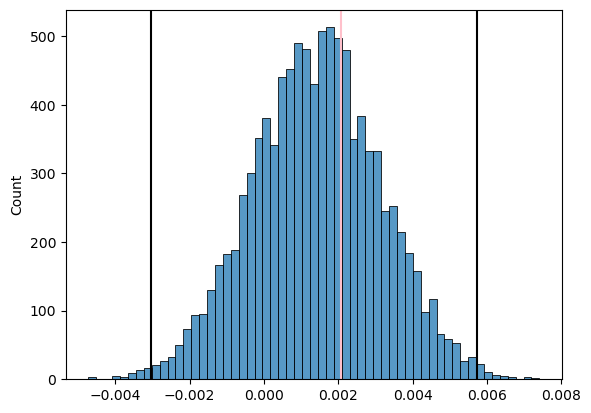

In [48]:
sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="pink")
plt.axvline(nvl_995,c="black")
plt.axvline(nvl_005,c="black")

## No hay suficiente evidencia estadistica para rechazar la hipotesis nula 

In [49]:
## Calcular estadisticas y obtener valor P (Basada en dos colas) se usa el valor absoluto que permite valores negativos y positivos 

p = np.sum(abs(perm_replicates) >= abs(diff_empiricas_prop)) / len(perm_replicates)

## Imprimir resultado
        
print('p-value =',p)


p-value = 0.372


In [50]:
nvl_95 = np.percentile(perm_replicates,95)
nvl_975 = np.percentile(perm_replicates,97.5)
nvl_995 = np.percentile(perm_replicates,99.5)

nvl_5 = np.percentile(perm_replicates,5)
nvl_275 = np.percentile(perm_replicates,2.5)
nvl_005 = np.percentile(perm_replicates,0.5)

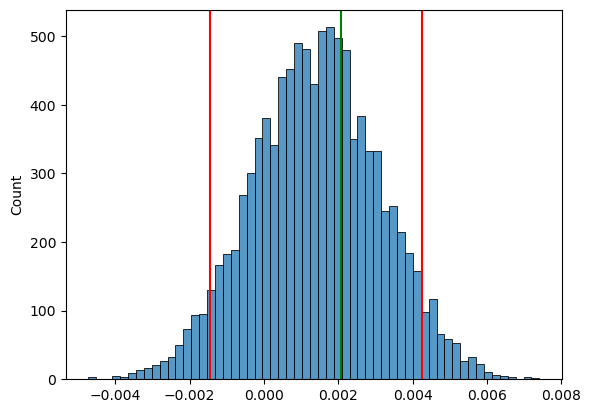

In [51]:
## De acuerdo con los valores P y valor de significancia , juzgue si se acepta la hipotesis nula , si es necesario realice un grafico para visualizar la informacion obtenida

## La hipotesis nula se acepta cuando el valor de P es mayor al valor de significancia 

sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="green")
plt.axvline(nvl_95,c="red")
plt.axvline(nvl_5,c="red")

## El valor de P es menor al valor de significancia que se esta trabajando  , significa que no hay suficiente evidencia estadistica para aceptar la hipotesis nula 

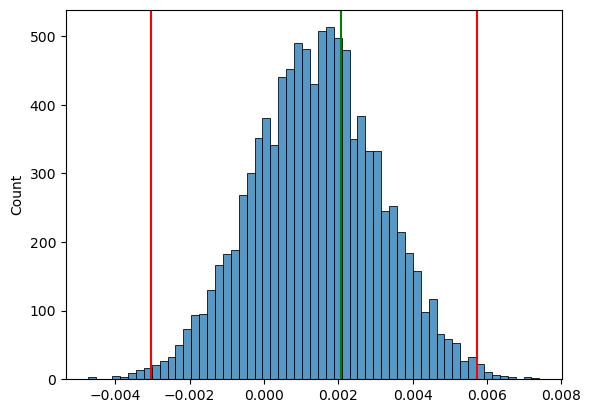

In [52]:
sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop,c="green")
plt.axvline(nvl_995,c="red")
plt.axvline(nvl_005,c="red")

## No Hay suficiente evidencia estradistica para aceptarla hipotesis nula 